**MICROSOFT MOVIE PROJECT** 

**1.Business Perspective**

Movie and film production is a lucrative industry. However it is an expensive and costly affair therefore an organisation has to do extensive research before hitting the ground running. Luckily for  Microsoft movie project there is data available that I will use to analyse and come up with actionable insights for the head of Microsoft new movie studio on the types of film to produce.

**Metric of success**

Being able to identify the best types of film that Microsoft should create using the avaiable data.

TO accomplish my objectives, I will use the following datasets:

1. Movie_info data dataset

2. Bom.mvoie dataset

3. IM.db database


My focus will be to investigate the following business aspects for the project:


1. Major competitors in the film industry.

2. Comparison between domestic and foreign market which generates more revenue

3. The best genre of film to produce depending on the revenue generated from the box office

**2. Data Understanding**

(a) Importing relevant libraries.

In [192]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import sqlite3
from zipfile import ZipFile

(b) Loading and reading datasets.

  (i) I start with the box office dataset.

In [193]:
bmovie = pd.read_csv('bom.movie_gross.csv.gz')

#data of first five rows
bmovie.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [194]:
#data of the last five rows
bmovie.tail()

,title,studio,domestic_gross,foreign_gross,year
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018
3386,An Actor Prepares,Grav.,1700.0,NaN,2018


*observation:*The dataset is uniform from top to bottom however data on foreign_gross appears to be missing values at the end.

In [232]:
#Determine the number of records in our dataset

print(bmovie.shape)

(3387, 5)


*observation:* The dataset has 3387 records and 5 variables
(3387 rows, 5 columns)

In [233]:
# Checking datatype and missing values
bmovie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


*observation* The dataset has a float, integers and string data type. Foreign_gross has a number of missing values.

In [234]:
# descriptive statistical data

bmovie.describe()

,domestic_gross,year
count,3.359000e+03,3387.000000
mean,2.874585e+07,2013.958075
std,6.698250e+07,2.478141
min,1.000000e+02,2010.000000
25%,1.200000e+05,2012.000000
50%,1.400000e+06,2014.000000
75%,2.790000e+07,2016.000000
max,9.367000e+08,2018.000000


(ii). IM.DB DATABASE

In [235]:
# Opening database file from IM. database
imdb = ZipFile('im.db.zip')
imdb.extract('im.db')
imdb.close()

I create a connection to the database 

In [236]:
conn = sqlite3.connect('im.db')
cur  = conn.cursor()

#To check the number of tables in the database set.
cur.execute("""
            SELECT
            name FROM sqlite_master WHERE type = 'table'""")
table = cur.fetchall()
table

[('movie_basics',),
 ('directors',),
 ('known_for',),
 ('movie_akas',),
 ('movie_ratings',),
 ('persons',),
 ('principals',),
 ('writers',)]

In [237]:
# Create a table using pandas dataframe to view the database of the movie BASIC.

basic_table = pd.read_sql(""" 
            SELECT * FROM movie_basics;""", conn)
basic_table.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [238]:
# Checking datatype
basic_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


*Observation*: database has float, integer and string datatype.

In [239]:
# Create a table using pandas dataframe to view movie RATINGS.

ratings_table = pd.read_sql("""
            SELECT * FROM movie_ratings;""", conn)
ratings_table.head()

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [240]:
#checking datatype
ratings_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movie_id       73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


*Observation* The database base float, integer and string datatype.

I join the movie rating and the movie basic table.

In [241]:
tables = pd.read_sql("""
                      SELECT * 
                      FROM movie_ratings
                      LEFT JOIN movie_basics
                      USING(movie_id);""", conn)
tables.head()

,movie_id,averagerating,numvotes,primary_title,original_title,start_year,runtime_minutes,genres
0,tt10356526,8.3,31,Laiye Je Yaarian,Laiye Je Yaarian,2019,117.0,Romance
1,tt10384606,8.9,559,Borderless,Borderless,2019,87.0,Documentary
2,tt1042974,6.4,20,Just Inès,Just Inès,2010,90.0,Drama
3,tt1043726,4.2,50352,The Legend of Hercules,The Legend of Hercules,2014,99.0,"Action,Adventure,Fantasy"
4,tt1060240,6.5,21,Até Onde?,Até Onde?,2011,73.0,"Mystery,Thriller"


In [242]:
#checking tables datatype
tables.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_id         73856 non-null  object 
 1   averagerating    73856 non-null  float64
 2   numvotes         73856 non-null  int64  
 3   primary_title    73856 non-null  object 
 4   original_title   73856 non-null  object 
 5   start_year       73856 non-null  int64  
 6   runtime_minutes  66236 non-null  float64
 7   genres           73052 non-null  object 
dtypes: float64(2), int64(2), object(4)
memory usage: 4.5+ MB


(iii). MOVIE_INFO DATASET

In [243]:
# opening the dataset

m_info = pd.read_csv('rt.movie_info.tsv.gz', delimiter='\t', encoding = 'latin1')

# check first five row of the dataset

m_info.head()


,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


In [244]:
# Determine the number of records in our dataset

print(m_info.shape)

(1560, 12)


*observation* Dataset has 1560 rows and 12 columns.

In [245]:
# check for datatype and missing values
m_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1560 non-null   int64 
 1   synopsis      1498 non-null   object
 2   rating        1557 non-null   object
 3   genre         1552 non-null   object
 4   director      1361 non-null   object
 5   writer        1111 non-null   object
 6   theater_date  1201 non-null   object
 7   dvd_date      1201 non-null   object
 8   currency      340 non-null    object
 9   box_office    340 non-null    object
 10  runtime       1530 non-null   object
 11  studio        494 non-null    object
dtypes: int64(1), object(11)
memory usage: 146.4+ KB


*observation* The dataset has integer and string datatype. Columns containing dvd_date, threater_date, curreny, box_office, and studio contain a lot of missing values hence need to be dropped.

In [246]:
# Remove missing values

m_info = m_info.dropna()

In [247]:
# Remove duplicate values

m_info = m_info.drop_duplicates()

In [248]:
#Convert box office column from string to float
Box_office = m_info['box_office'].str.replace(',', '').astype(float)

In [249]:
# New dataframe

frame = pd.DataFrame(Box_office)

**3. Data Cleaning and Preparation**






Step that will be carried out at this stage include:

 (i) Identifying missing values

 (ii) Determine what action to take on the missing value (drop, maintain or fill using in using mean or median).

 (iii) Check out if column have required datatype.

In [250]:
#check for null values in box_office dataset

bmovie.isnull().sum()

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

*Obeservation:*  From the above data, it can be seen that most foreign_gross income is not available. Also from the domestic_gross seems we do not have earnings from 28 movie. Hence to work efficently with our data, we will drop all the records that contain missing values. 

In [251]:
# Remove all the null values in the box office dataset

b_clean = bmovie.dropna()

In [252]:
# Check if all null values have been removed in box office dataset

b_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2007 entries, 0 to 3353
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           2007 non-null   object 
 1   studio          2007 non-null   object 
 2   domestic_gross  2007 non-null   float64
 3   foreign_gross   2007 non-null   object 
 4   year            2007 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 94.1+ KB


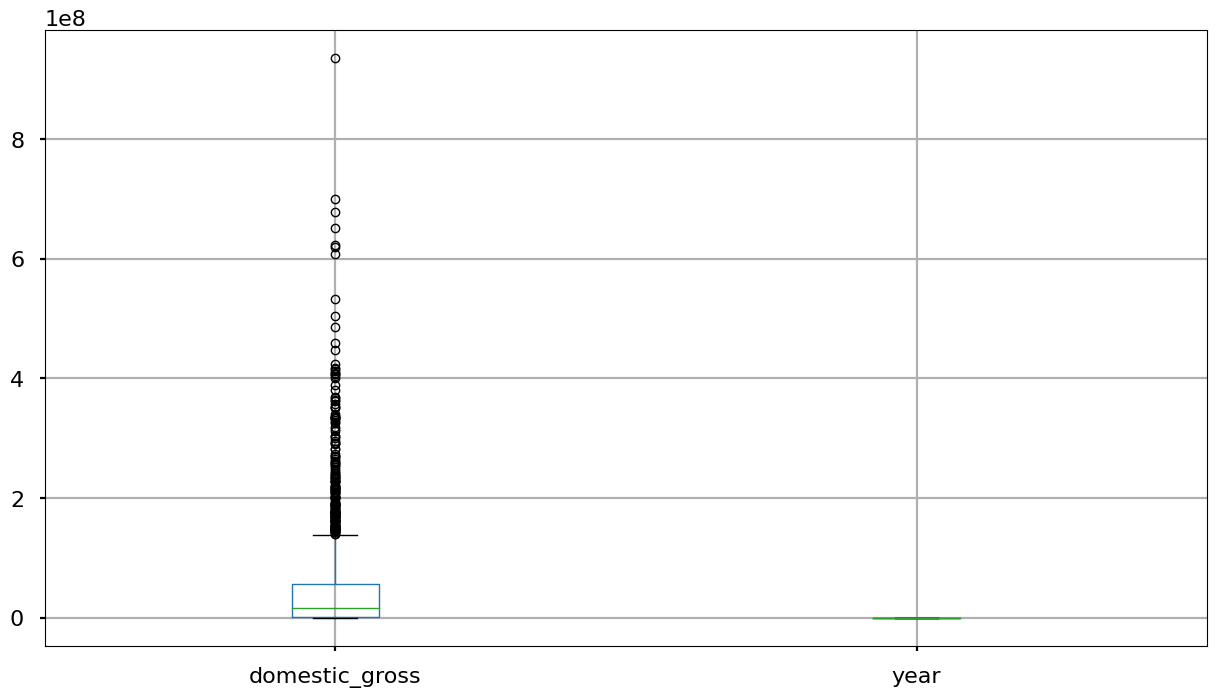

In [253]:
#checking for outliers in box office dataset

plt.figure(figsize = (15, 8))
b_clean.boxplot()
plt.show()

Obersvations: We have outliers in domestics_gross that I consider genuine. This may be influenced by other fcators such as the actors or director of the movie.

In [254]:
# Descriptive statictics b_clean

b_clean.describe()

,domestic_gross,year
count,2.007000e+03,2007.000000
mean,4.701984e+07,2013.506228
std,8.162689e+07,2.597997
min,4.000000e+02,2010.000000
25%,6.700000e+05,2011.000000
50%,1.670000e+07,2013.000000
75%,5.605000e+07,2016.000000
max,9.367000e+08,2018.000000


*Data cleaning of the IM.DB database*

In [255]:
#check for dublicates in the joined table

tables = tables[tables.duplicated()]
tables

,movie_id,averagerating,numvotes,primary_title,original_title,start_year,runtime_minutes,genres


In [256]:
# Check for null values in the joined table
tables.isna().sum()

movie_id           0.0
averagerating      0.0
numvotes           0.0
primary_title      0.0
original_title     0.0
start_year         0.0
runtime_minutes    0.0
genres             0.0
dtype: float64

*Observation:* Our database is clean hence I can proceed to analysis step.

**4. Data Analysis**



After Cleaning the dataset, we can observe that all the dataset are in  order except for foreign_gross that is in string type and should be in float type.

In [257]:
# Converting string to float type

foreign_float = b_clean['foreign_gross'].str.replace(',', '').astype(float)

Then we convert the format of the newly formed string to dataframe type.

In [258]:
df_foreign_gross = pd.DataFrame(foreign_float)

# Combine the two dataframes

b_clean  = pd.concat([b_clean, df_foreign_gross], axis=1)

Next, I drop foreign_gross as object and make it become a float.

In [259]:
b_clean = b_clean.iloc[:, [0, 1, 2, 4, 5]]

b_clean.info() # New dataframe 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2007 entries, 0 to 3353
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           2007 non-null   object 
 1   studio          2007 non-null   object 
 2   domestic_gross  2007 non-null   float64
 3   year            2007 non-null   int64  
 4   foreign_gross   2007 non-null   float64
dtypes: float64(2), int64(1), object(2)
memory usage: 94.1+ KB


I create a new column that will enable me Identify which genre of movie makes the highest gross income both dometically and foreign gross.

In [260]:
b_clean['gross total'] = b_clean['domestic_gross'] + b_clean['foreign_gross']

b_clean.head(10) # New dataframe with gross total income of top 10 movies.

,title,studio,domestic_gross,year,foreign_gross,gross total
0,Toy Story 3,BV,415000000.0,2010,652000000.0,1.067000e+09
1,Alice in Wonderland (2010),BV,334200000.0,2010,691300000.0,1.025500e+09
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,2010,664300000.0,9.603000e+08
3,Inception,WB,292600000.0,2010,535700000.0,8.283000e+08
4,Shrek Forever After,P/DW,238700000.0,2010,513900000.0,7.526000e+08
5,The Twilight Saga: Eclipse,Sum.,300500000.0,2010,398000000.0,6.985000e+08
6,Iron Man 2,Par.,312400000.0,2010,311500000.0,6.239000e+08
7,Tangled,BV,200800000.0,2010,391000000.0,5.918000e+08
8,Despicable Me,Uni.,251500000.0,2010,291600000.0,5.431000e+08
9,How to Train Your Dragon,P/DW,217600000.0,2010,277300000.0,4.949000e+08



**i. Identify the current big film makers in the movie industry from gross total revenue generated.**

This will help us identify film makers generating highest amount of gross revenue both local and internationaly. Who will be our main compitetor once we join the field.



In [261]:
# Upper quatitle using 80%

upper_quantile = b_clean['gross total'].quantile(0.8)

#Studios in the upper quantile

top_studios_gross = b_clean.loc[b_clean['gross total'] > upper_quantile]

<ipython-input-262-c59b91ee696b>:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-poster')


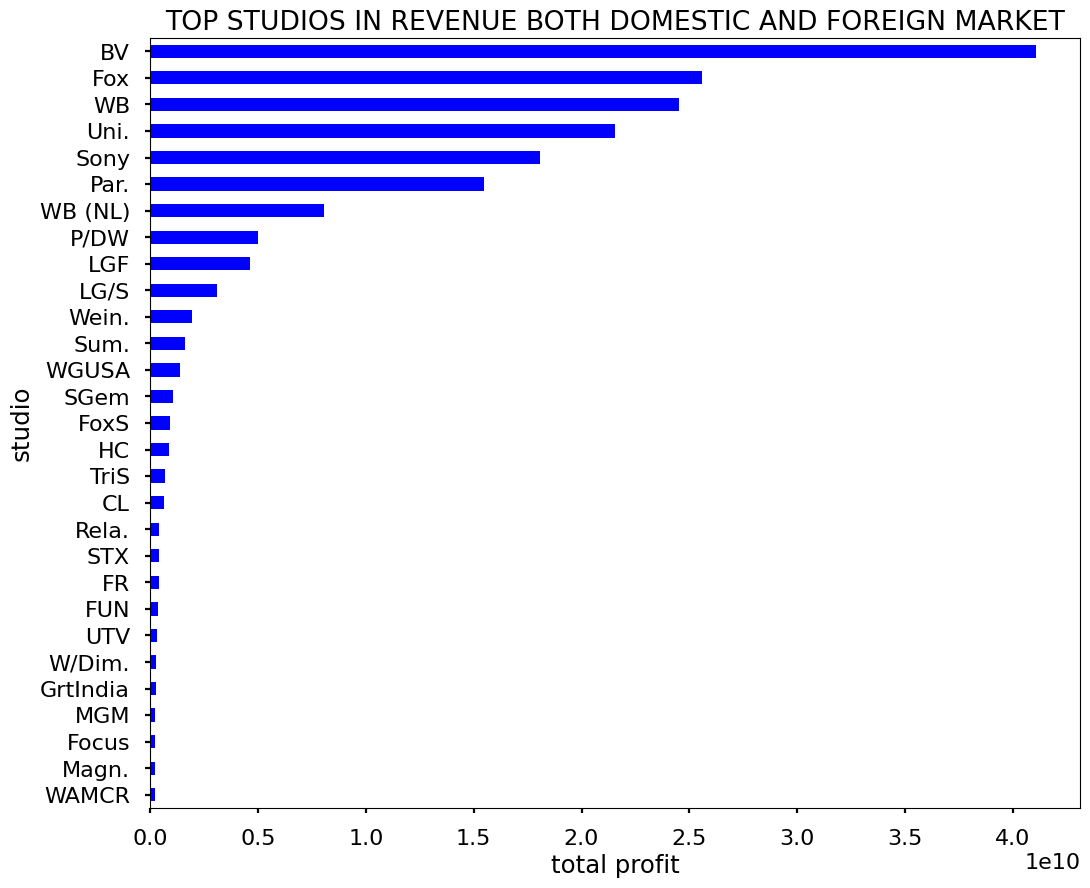

In [262]:
# data visualization

plt.style.use('seaborn-poster')
ax = top_studios_gross.groupby('studio')['gross total'].agg('sum').sort_values().plot.barh(color='blue', figsize= (12,10))
ax.set_title('TOP STUDIOS IN REVENUE BOTH DOMESTIC AND FOREIGN MARKET')
ax.set_xlabel('total profit');

From the chart we can observe the top five film maker generating the highest revenue from the film industry both locally and foreign market are:

      1. Buena Vista studio

      2. Fox studio

      3. Warner brothers

      4. Universal studio

      5. Sony

This will be our main compitetors as we venture into the film business.


**ii. Idenitify main soure of revenue between the domestic market and foreign market**

In [226]:
# print the average profit in domestic and foreign market

print('Profit in domestic market:', b_clean['domestic_gross'].mean())
print('Profit in foreign market:', b_clean['foreign_gross'].mean())

Profit in domestic market: 47019840.20179372
Profit in foreign market: 75790384.84130543


In [227]:
# New dataframe for the average markets

markets = ['domestic', 'foreign']
average_profits = [47019840.20, 75790384.84]
zipped = list(zip(markets, average_profits))
df_new = pd.DataFrame(zipped, columns=['markets', 'average_profits'])

Text(0.5, 0, 'Markets')

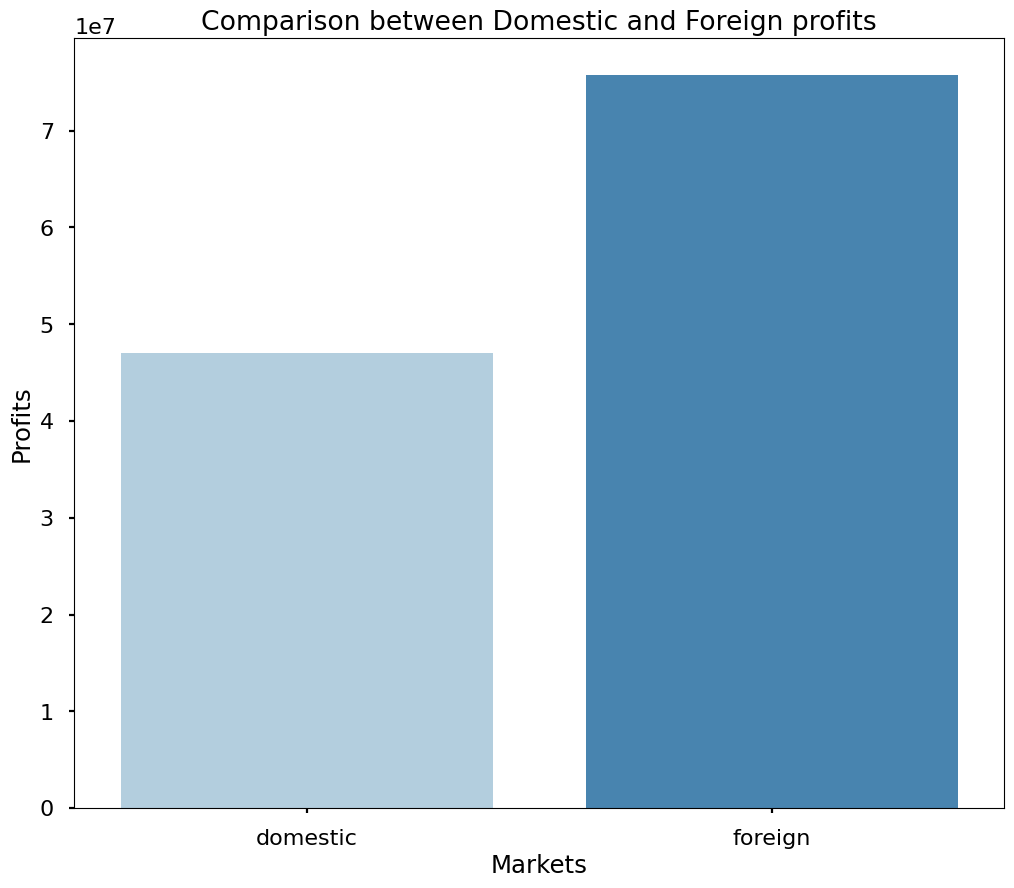

In [228]:
# Visualize the new dataframe

plt.figure(figsize=(12,10))
ax = sns.barplot(x = markets, y = average_profits, data = df_new, palette = 'Blues')
ax.set_title('Comparison between Domestic and Foreign profits')
ax.set_ylabel('Profits')
ax.set_xlabel('Markets')

By looking at the bar plots we can see that foreign market generates more reneue than local marktet. Hence the new stuio being set up should consideration on what types of movies the international market consumes for more revenue to be generated.

**iii. Identify top twenty highest earning genres in the box office dataset**


To get highest earning genre of movie, I combine movie_info data set which containing data for (runtime, genre, director and revenu) and box office movie dataset.

In [263]:
new_boxoffice = pd.concat([m_info, frame], axis=1)

#select genre, box office object and box-office float

new_boxoffice = new_boxoffice[['genre', 'box_office', 'box_office']]

In [265]:
# select columns box_office and genre as float

box_office = new_boxoffice.iloc[:, [0,2]]

# grouping dataset by genre or total box office
grouped = box_office.groupby('genre')['box_office'].sum().sort_values(ascending = False)

Text(0.5, 1.0, 'Top Twenty Genres with Highest Income')

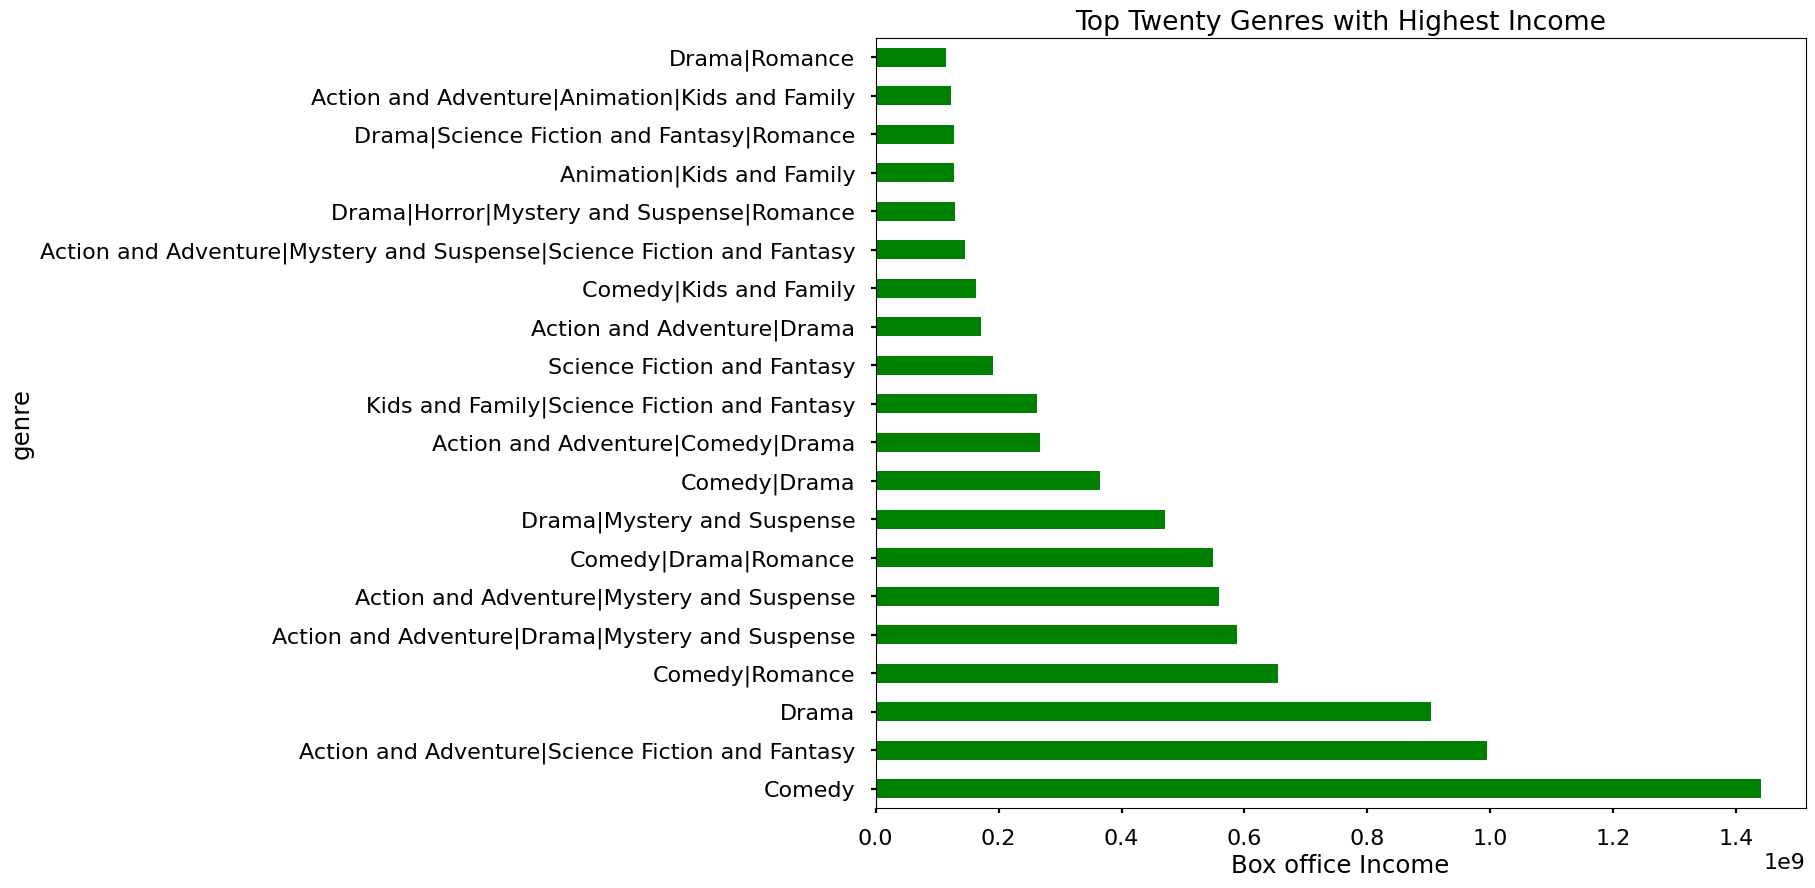

In [266]:
# Twenty, first rows with highest box_office reveues

ax = grouped[0:20].plot.barh(color = 'green', figsize = (12, 10));
ax.set_xlabel('Box office Income')
ax.set_title( 'Top Twenty Genres with Highest Income')

*observation:*  From the barplot, we can clearly see that that comedy generates the highest amount of revenue. Generally little resources are required to produce comedy and they can easily market themselves by word of mouth if the content is funny.
This closely followed by action and adevnture movie due to the curious nature of human beings.
Also prodcution of drama film should be consider when coming up with the new studio.

**CONCLUSION**

From my analyses I was able to arrive at the following recommedations to the Microsoft Studio Project team.

**Recommendations**

1. Focus more on production of comedy flim. This is because they have a low production cost and there returns are quite high. The next category to focus on is the Action and science fiction film production.

2. Marketing of the produced movies should focus both on the local market and foreign market. Since the revenue generated by both markets is high.

3. Work on producing better movies than our competitors in both local and foreign market. They are well established and understand the market.

The Microsoft Movie Studio is a feasible project from my analysis hence it can proceed